In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Efficient EEG Data Preprocessing with Chunking and Duplicate Removal**

In [2]:
import os
import mne
import numpy as np
import contextlib
import sys

# Function to suppress output
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, 'w') as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# Function to load and preprocess EEG data with chunking and visualization
def load_and_preprocess_eeg_silent(folder_path, label, chunk_size):
    data = []
    labels = []
    relevant_electrodes = [
        'EEG F3-Cz', 'EEG Fz-Cz', 'EEG F4-Cz',
        'EEG C3-Cz', 'EEG Cz-Cz', 'EEG C4-Cz',
        'EEG P3-Cz', 'EEG Pz-Cz', 'EEG P4-Cz'
    ]

    print(f"Loading data from: {folder_path}")
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.edf'):
            file_path = os.path.join(folder_path, file_name)
            try:
                # Suppress output while loading EDF files
                with suppress_stdout():
                    raw = mne.io.read_raw_edf(file_path, preload=True)
                    raw.pick_channels(relevant_electrodes)

                # Get the EEG data as a NumPy array
                eeg_data = raw.get_data()

                # Divide the data into chunks of size `chunk_size`
                n_samples = eeg_data.shape[1]
                for start in range(0, n_samples, chunk_size):
                    end = start + chunk_size
                    if end <= n_samples:
                        chunk = eeg_data[:, start:end]
                        data.append(chunk)
                        labels.append(label)

                # Debugging: Check the number of chunks created for this file
                print(f"\nFile: {file_name}, Shape of EEG data: {eeg_data.shape}      Number of chunks : {round(n_samples // chunk_size)}")
            except Exception as e:
                print(f"Error loading {file_name}: {e}")

    # Convert the list to a NumPy array
    data = np.array(data)
    labels = np.array(labels)
    print(f"\nCombined shape of all data: {data.shape}")
    print(f"Combined shape of all labels: {labels.shape}")
    
    
    print(f"\nCombined shape of all data Before Removig Duplicate: {data.shape}")
    print(f"Combined shape of all labels Before Removig Duplicate: {labels.shape}")

    # Remove duplicate entities from the data
    unique_data, unique_indices = np.unique(data, axis=0, return_index=True)
    unique_labels = labels[unique_indices]

    print(f"\nShape of unique data After Removig Duplicate: {unique_data.shape}")
    print(f"Shape of unique labels After Removig Duplicate: {unique_labels.shape}")

    return unique_data, unique_labels
    


In [3]:

# aths to your dataset folders
control_folder = '/kaggle/input/my-dataset/Dataset/Control EEG'
ds_folder = '/kaggle/input/my-dataset/Dataset/DS cases'

# Choose a chunk size (e.g., 10,000 samples per chunk)
chunk_size = 10000
ds_data, ds_labels = load_and_preprocess_eeg_silent(ds_folder, 1, chunk_size)

Loading data from: /kaggle/input/my-dataset/Dataset/DS cases

File: Copy of 73716.edf, Shape of EEG data: (9, 944750)      Number of chunks : 94

File: Copy of 23281f.edf, Shape of EEG data: (9, 873500)      Number of chunks : 87

File: Copy of 79426.edf, Shape of EEG data: (9, 924000)      Number of chunks : 92

File: Copy of 92446.edf, Shape of EEG data: (9, 812500)      Number of chunks : 81

File: Copy of 111822.edf, Shape of EEG data: (9, 11268250)      Number of chunks : 1126

File: Copy of 92187.edf, Shape of EEG data: (9, 914750)      Number of chunks : 91

File: Copy of 148074.edf, Shape of EEG data: (9, 827000)      Number of chunks : 82

File: Copy of 167741.edf, Shape of EEG data: (9, 913500)      Number of chunks : 91

File: Copy of 138825.edf, Shape of EEG data: (9, 938250)      Number of chunks : 93

Combined shape of all data: (1837, 9, 10000)
Combined shape of all labels: (1837,)

Combined shape of all data Before Removig Duplicate: (1837, 9, 10000)
Combined shape of a

In [4]:
control_data, control_labels = load_and_preprocess_eeg_silent(control_folder, 0, chunk_size)

Loading data from: /kaggle/input/my-dataset/Dataset/Control EEG

File: 172404.edf, Shape of EEG data: (9, 815000)      Number of chunks : 81

File: 121139.edf, Shape of EEG data: (9, 1072250)      Number of chunks : 107

File: 158439.edf, Shape of EEG data: (9, 1116750)      Number of chunks : 111

File: 71075.edf, Shape of EEG data: (9, 800000)      Number of chunks : 80

File: 71075a.edf, Shape of EEG data: (9, 898750)      Number of chunks : 89

File: 171610.edf, Shape of EEG data: (9, 1084250)      Number of chunks : 108

File: 158439a.edf, Shape of EEG data: (9, 1030250)      Number of chunks : 103

File: 113566.edf, Shape of EEG data: (9, 1173000)      Number of chunks : 117

File: 144955.edf, Shape of EEG data: (9, 1210000)      Number of chunks : 121

File: 87925.edf, Shape of EEG data: (9, 900500)      Number of chunks : 90
Error loading 75872a.edf: Missing channels from ch_names required by include:
['EEG F3-Cz', 'EEG Fz-Cz', 'EEG F4-Cz', 'EEG C3-Cz', 'EEG Cz-Cz', 'EEG C4-Cz'

/tmp/ipykernel_36/938482883.py:35: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  raw = mne.io.read_raw_edf(file_path, preload=True)



File: 75872.edf, Shape of EEG data: (9, 1033000)      Number of chunks : 103

File: 121139a.edf, Shape of EEG data: (9, 999750)      Number of chunks : 99

File: 83810.edf, Shape of EEG data: (9, 321250)      Number of chunks : 32
Error loading 77862.edf: Missing channels from ch_names required by include:
['EEG F3-Cz', 'EEG Fz-Cz', 'EEG F4-Cz', 'EEG C3-Cz', 'EEG Cz-Cz', 'EEG C4-Cz', 'EEG P3-Cz', 'EEG Pz-Cz', 'EEG P4-Cz']

File: 171679.edf, Shape of EEG data: (9, 1187500)      Number of chunks : 118

File: 113566a.edf, Shape of EEG data: (9, 703750)      Number of chunks : 70

Combined shape of all data: (1831, 9, 10000)
Combined shape of all labels: (1831,)

Combined shape of all data Before Removig Duplicate: (1831, 9, 10000)
Combined shape of all labels Before Removig Duplicate: (1831,)

Shape of unique data After Removig Duplicate: (1198, 9, 10000)
Shape of unique labels After Removig Duplicate: (1198,)


# **Converting Labels to Categorical**

In [5]:
import os
import mne
import numpy as np
import pandas as pd  # Add pandas for easier data management
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Step 1: Create a DataFrame from the data and labels
data_list = [chunk for chunk in control_data] + [chunk for chunk in ds_data]
labels_list = [0] * len(control_data) + [1] * len(ds_data)

# Convert to a DataFrame for easy shuffling
dataset = pd.DataFrame({'data': data_list, 'label': labels_list})


2025-08-26 08:26:06.004171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756196766.186750      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756196766.245737      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Data Inspection and Shape Validation**

In [6]:
dataset[dataset['label'] == 1].shape,dataset[dataset['label'] == 0].shape 

((1625, 2), (1198, 2))

In [7]:
dataset.shape

(2823, 2)

In [8]:
dataset.head()

,data,label
0,"[[-0.000934735744258793, -0.000933235767147325...",0
1,"[[-0.00030574534218356605, -0.0002832456855115...",0
2,"[[-0.0002732458381017777, -0.00028024573128862...",0
3,"[[-0.00024124632639047837, -0.0002492462043183...",0
4,"[[-0.0002137467460135805, -0.00022074663920042...",0


# **Data Shuffling**

In [9]:
# Step 2: Shuffle the DataFrame
df = shuffle(dataset, random_state=26)
print(df.tail(5))

                                                   data  label
1985  [[-2.24997329671168e-06, 2.6249591821164265e-0...      1
1456  [[-8.824866102082855e-05, -6.074908064393072e-...      1
1798  [[-1.5749767299916073e-05, 0.00016424748607614...      1
1342  [[-0.0001352479438467994, 9.774850080109866e-0...      1
821   [[8.749858854047457e-06, -3.7499504081788347e-...      0


# **Splitting Data into Training and Testing Sets**

In [10]:

# Step 3: Extract shuffled data and labels
all_data = np.array(df['data'].tolist())
all_labels = np.array(df['label'].tolist())

# Debugging: Check shapes
print(f"Combined data shape: {all_data.shape}")
print(f"Combined labels shape: {all_labels.shape}")

# Step 4: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(all_data, all_labels, test_size=0.2, random_state=42)

# Step 5: Reshape the data to match the input format for LSTM models
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[1])

# Debugging: Check the reshaped data shapes
print(f"Training data shape: {X_train.shape}, Training labels shape: {Y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {Y_test.shape}")

# Step 6: Convert labels to categorical
Y_train = to_categorical(Y_train, num_classes=2)
Y_test = to_categorical(Y_test, num_classes=2)


Combined data shape: (2823, 9, 10000)
Combined labels shape: (2823,)
Training data shape: (2258, 10000, 9), Training labels shape: (2258,)
Testing data shape: (565, 10000, 9), Testing labels shape: (565,)


# **Data Normalization**

**Channel-wise Normalization Using StandardScalerIntroduce how data normalization is applied across individual channels using StandardScaler.**


In [11]:
from sklearn.preprocessing import StandardScaler

# Normalize each channel individually across the time dimension
def normalize_eeg_data(data):
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Apply normalization to each sample and each channel
    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            data[i, :, j] = scaler.fit_transform(data[i, :, j].reshape(-1, 1)).flatten()
    return data

# Normalize the training and testing data
X_train = normalize_eeg_data(X_train)
X_test = normalize_eeg_data(X_test)

# Check the shape again to ensure it hasn't changed
print(f"Normalized training data shape: {X_train.shape}")
print(f"Normalized testing data shape: {X_test.shape}")


Normalized training data shape: (2258, 10000, 9)
Normalized testing data shape: (565, 10000, 9)


# **Hybrid CNN-LSTM Model for EEG Signal Classification**
**This model combines CNN layers for spatial feature extraction and LSTM layers for capturing temporal dependencies in EEG data, ensuring robust classification performance**

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Input, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define the input shape based on your dataset
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)

# Explicitly define the input layer
inputs = Input(shape=input_shape)

# CNN layers with LeakyReLU
x = Conv1D(256, kernel_size=3)(inputs)
x = LeakyReLU(alpha=0.1)(x)  # Leaky ReLU activation
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

# LSTM layers with LeakyReLU
x = LSTM(256, return_sequences=True, activation='tanh')(x)  # LSTM's default activation is 'tanh'
x = LeakyReLU(alpha=0.1)(x)  # Apply LeakyReLU after LSTM
x = Dropout(0.3)(x)
x = LSTM(256, return_sequences=True, activation='tanh')(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.4)(x)
x = LSTM(128, activation='tanh')(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.4)(x)

# Output layer
outputs = Dense(2, activation='softmax')(x)

# Create the model
model_lstm_cnnV2 = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_lstm_cnnV2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model_lstm_cnnV2.summary())

# Configure callbacks for training
earlyStopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    mode='min',
    verbose=1,
    restore_best_weights=True
)
modelCheckpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
history_lstm_cnnV2 = model_lstm_cnnV2.fit(
    X_train, Y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    shuffle=True,
    callbacks=[earlyStopping, modelCheckpoint, lr_scheduler]
)

# Save the model
model_lstm_cnnV2.save('trained_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 10000, 9)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 9998, 256)           │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 9998, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 9998, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 4999, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4999, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 4999, 256)           │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 4999, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4999, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 4999, 256)           │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 4999, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4999, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,256,194 (4.79 MB)

 Trainable params: 1,255,682 (4.79 MB)

 Non-trainable params: 512 (2.00 KB)

None
Epoch 1/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 86s 656ms/step - accuracy: 0.6483 - loss: 0.6303 - val_accuracy: 0.5088 - val_loss: 0.6880 - learning_rate: 0.0010
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 83s 653ms/step - accuracy: 0.6914 - loss: 0.5880 - val_accuracy: 0.6549 - val_loss: 0.6586 - learning_rate: 0.0010
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 83s 653ms/step - accuracy: 0.7586 - loss: 0.4894 - val_accuracy: 0.7080 - val_loss: 0.5737 - learning_rate: 0.0010
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 83s 652ms/step - accuracy: 0.6435 - loss: 0.6655 - val_accuracy: 0.5531 - val_loss: 0.6861 - learning_rate: 0.0010
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 83s 652ms/step - accuracy: 0.6241 - loss: 0.6549 - val_accuracy: 0.5796 - val_loss: 0.6689 - learning_rate: 0.0010
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.6194 - loss: 0.6464
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
127/127 ━━━━━━━━━━━━━━━━━━━━ 83s 652ms/step - accu

# **Evaluating Model Performance on Test Data**

In [15]:
from sklearn.metrics import accuracy_score

# Predict class probabilities
predictions = model_lstm_cnnV2.predict(X_test)

# Convert probabilities to class labels (e.g., argmax for one-hot encoded outputs)
predicted_labels = np.argmax(predictions, axis=1)

# True labels
true_labels = np.argmax(Y_test, axis=1)

# Calculate accuracy
test_accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 403ms/step
Test Accuracy: 91.86%


# **Visualizing Model Latent Space with t-SNE**
**This section visualizes the latent space representation learned by the model using t-SNE. By mapping high-dimensional features to a 2D space, we compare the true labels and model predictions to analyze clustering and classification performance.**

Extracting latent space features from the model...
Initializing the model with input data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 427ms/step
Applying t-SNE to the model's latent space...


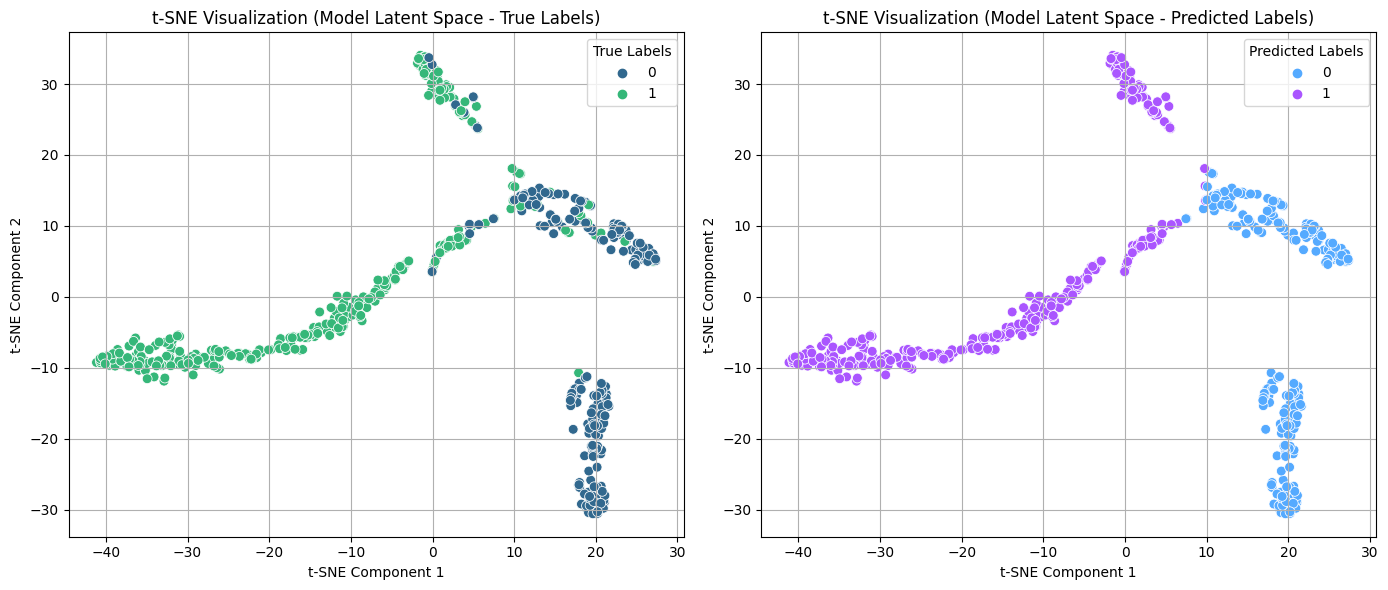

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns

def initialize_model_with_data(model, X_sample):
    """
    Initialize the model by explicitly calling it with input data.
    """
    print("Initializing the model with input data...")
    # Explicitly call the model with an input sample
    _ = model.predict(X_sample[:1], verbose=1)


def plot_tsne_with_predictions(model, X, predictions, true_labels, title):
    """
    Apply t-SNE to the latent space of the deep learning model and plot using predicted and true labels.
    """
    print("Extracting latent space features from the model...")

    # Ensure the model is initialized
    initialize_model_with_data(model, X)

    # Define intermediate model to extract features from the penultimate layer
    penultimate_layer = model.layers[-2]  # Adjust this if your penultimate layer index changes
    intermediate_layer_model = tf.keras.Model(
        inputs=model.input, outputs=penultimate_layer.output
    )

    # Extract latent features
    latent_features = intermediate_layer_model.predict(X, verbose=1)

    print("Applying t-SNE to the model's latent space...")
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    X_tsne = tsne.fit_transform(latent_features)

    # Plot the t-SNE result with true labels
    plt.figure(figsize=(14, 6))

    # Subplot 1: True Labels
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=true_labels, palette="viridis", s=50)
    plt.title(f"t-SNE Visualization ({title} - True Labels)")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend(loc="best", title="True Labels")
    plt.grid()

    # Subplot 2: Predicted Labels
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=predictions, palette="cool", s=50)
    plt.title(f"t-SNE Visualization ({title} - Predicted Labels)")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend(loc="best", title="Predicted Labels")
    plt.grid()

    plt.tight_layout()
    plt.show()



predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_labels = np.argmax(Y_test, axis=1)           # True class labels

# Visualize the t-SNE with true and predicted labels
plot_tsne_with_predictions(model_lstm_cnnV2, X_test, predicted_labels, true_labels, title="Model Latent Space")


# **Model Performance Visualization: Loss, Accuracy, and ROC Curve**



**Training and Validation Loss/Accuracy:The training and validation curves help monitor the model's learning process, identifying overfitting or underfitting.**



**ROC Curve:The Receiver Operating Characteristic (ROC) curve illustrates the model's ability to distinguish between classes, with the Area Under the Curve (AUC) quantifying its performance in binary classification.**


Model saved successfully!


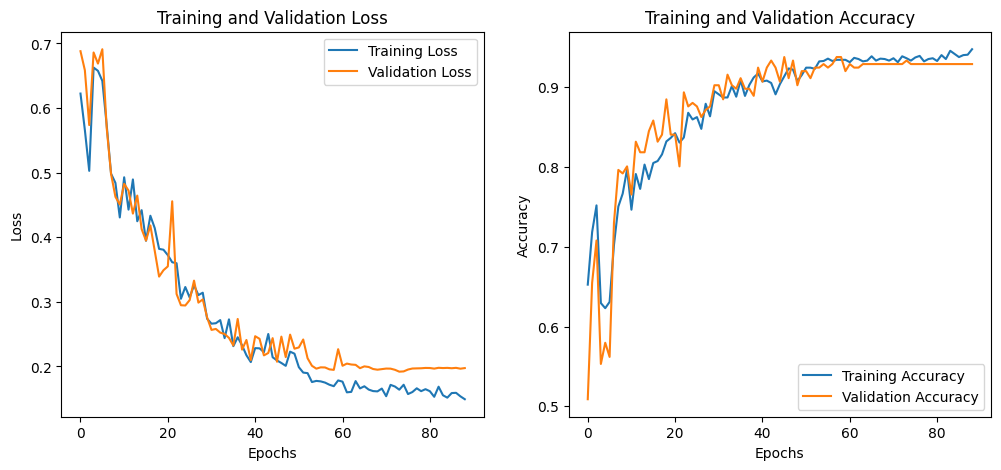

18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 388ms/step


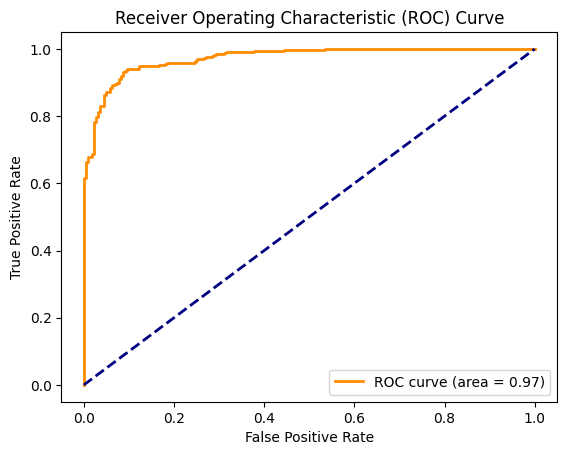

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Save the model
model_lstm_cnnV2.save('cnn_lstm_model_3.h5')
print("Model saved successfully!")

# Plotting Training and Validation Loss and Accuracy
def plot_history(history):
    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()



# Calculate and plot ROC curve
def plot_roc_curve(model, X_test, Y_test):
    # Get predictions
    y_pred_probs = model.predict(X_test)
    y_true = Y_test[:, 1] 
    y_pred_probs = y_pred_probs[:, 1]  # Probabilities for the positive class

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Call the function to plot
plot_history(history_lstm_cnnV2)
# Call the function to plot the ROC curve
plot_roc_curve(model_lstm_cnnV2, X_test, Y_test)


# **Confusion Matrix for Classification Evaluation**

18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 386ms/step


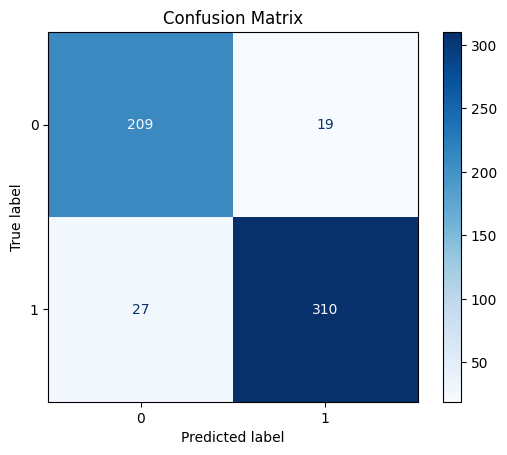

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_true = np.argmax(Y_test, axis=1)  # Convert one-hot encoded labels to class labels
y_pred = np.argmax(model_lstm_cnnV2.predict(X_test), axis=1)  # Get predicted class labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# **Evaluation Metrics for Model Performance**

**Accuracy: Overall Correctness of the Model**



**Precision: Positive Predictive Value**



**Recall: Sensitivity or True Positive Rate**



**F1-Score: Balance Between Precision and Recall**



**AUC-ROC: Ability to Distinguish Between Classes**

In [13]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


y_true = np.argmax(Y_test, axis=1)  # Convert one-hot encoded labels to class labels
y_pred_probs = model_lstm_cnnV2.predict(X_test)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get predicted class labels

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')



y_true_binary = Y_test[:, 1]  # Get binary labels for the positive class
y_pred_probs_binary = y_pred_probs[:, 1]  # Get probabilities for the positive class
auc_roc = roc_auc_score(y_true_binary, y_pred_probs_binary)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc if isinstance(auc_roc, float) else auc_roc}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 398ms/step
Accuracy: 91.86%
Precision: 0.92
Recall: 0.92
F1-Score: 0.92
AUC-ROC: 0.9732026654172523


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


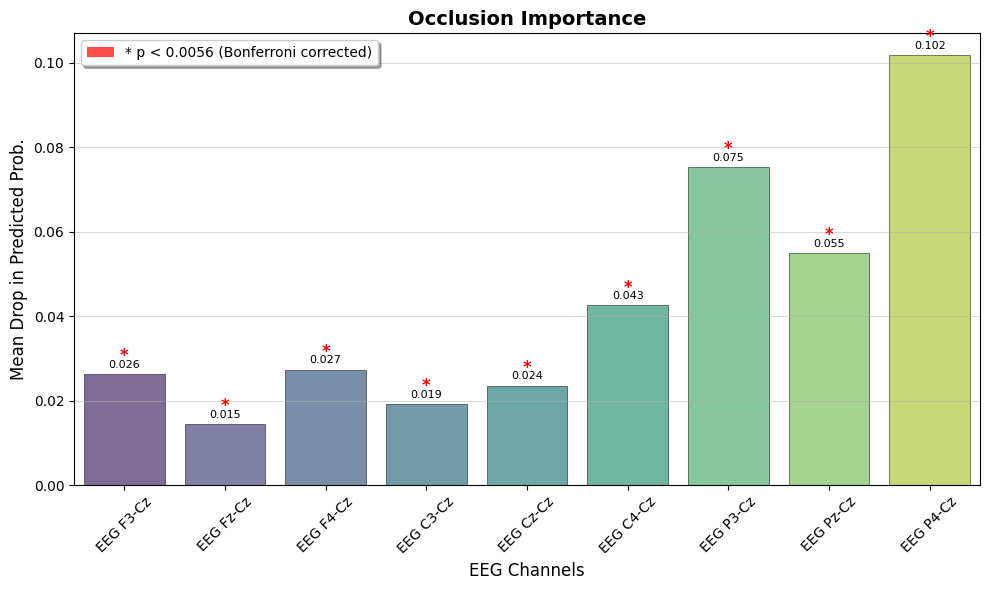

In [32]:
import numpy as np
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
# Concatenate datasets
X_all = np.concatenate([X_train, X_test], axis=0)

# Channel names
raw_ch_names = ['EEG F3-Cz', 'EEG Fz-Cz', 'EEG F4-Cz',
                'EEG C3-Cz', 'EEG Cz-Cz', 'EEG C4-Cz',
                'EEG P3-Cz', 'EEG Pz-Cz', 'EEG P4-Cz']

# Select samples for occlusion test
SAMPLE_INDICES = np.arange(X_all.shape[0])

# Baseline predictions
baseline_probs = model_lstm_cnnV2.predict(X_all[SAMPLE_INDICES], verbose=0)
pred_classes = baseline_probs.argmax(axis=1)
baseline_pred_probs = baseline_probs[np.arange(len(SAMPLE_INDICES)), pred_classes]


fig, ax = plt.subplots(figsize=(10, 6))

# Barplot
sns.barplot(ax=ax, x=raw_ch_names, y=channel_drops, palette="viridis", alpha=0.7)

# Bar edge styling
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

# Titles and labels
ax.set_title("Occlusion Importance", fontsize=14, fontweight='bold')
ax.set_ylabel("Mean Drop in Predicted Prob.", fontsize=12)
ax.set_xlabel("EEG Channels", fontsize=12)
ax.grid(True, alpha=0.7, linestyle='-', linewidth=0.5, axis='y')

# Annotate values & significance
for i, (drop, p) in enumerate(zip(channel_drops, pvals)):
    if p < alpha:
        ax.text(i, drop + 0.002, '*', ha='center', va='bottom', fontsize=12, color='red', fontweight='bold')
    ax.text(i, drop + 0.001, f'{drop:.3f}', ha='center', va='bottom', fontsize=8)

# Rotate labels
ax.tick_params(axis='x', rotation=45)

# Legend for significance
legend_elements = [Patch(facecolor='red', alpha=0.7, label=f'* p < {alpha:.4f} (Bonferroni corrected)')]
ax.legend(handles=legend_elements, loc='best', frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()


# **Electrode-wise Comparison of EEG Signals Before and After Normalization**

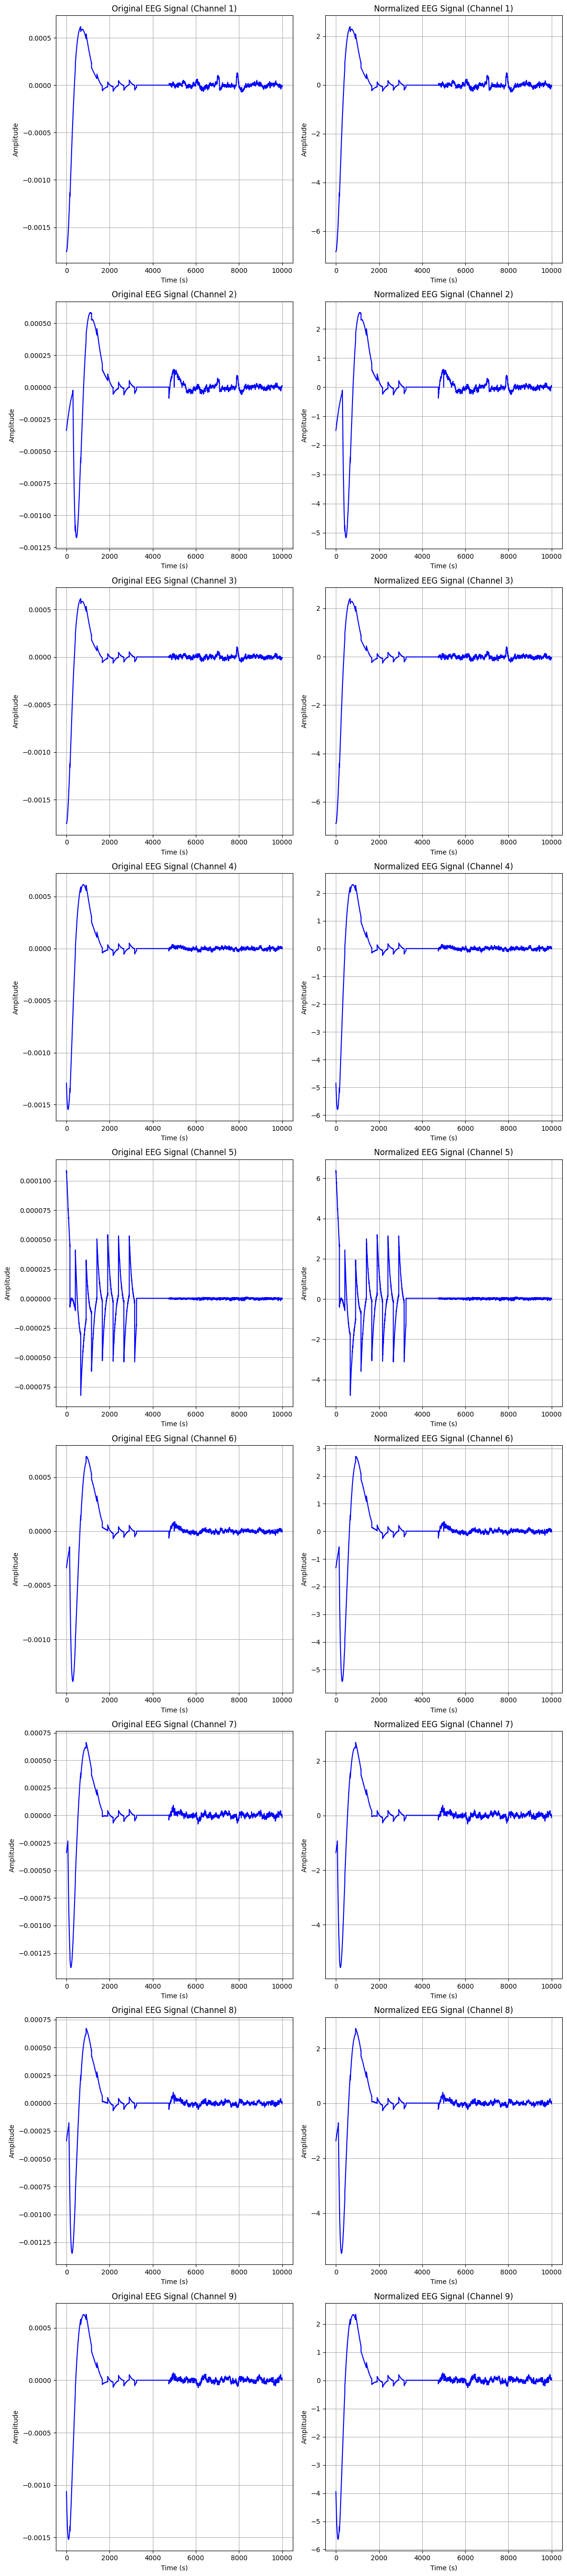

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Function to normalize each electrode separately
def normalize_electrodes_separately(data):
    normalized_data = np.zeros_like(data)
    for channel in range(data.shape[1]):  # Normalize each electrode/channel separately
        scaler = StandardScaler()
        channel_data = data[:, channel, :]  # Extract all samples for this channel
        normalized_channel = scaler.fit_transform(channel_data.T).T  # Normalize across all samples
        normalized_data[:, channel, :] = normalized_channel
    return normalized_data

# Normalize the control EEG data
ds_data = np.array(ds_data)
normalized_ds_data = normalize_electrodes_separately(ds_data)

# Function to plot signals before and after normalization for each electrode
def plot_signals_before_after(original_data, normalized_data, sample_idx=0):
    n_channels = original_data.shape[1]
    plt.figure(figsize=(12, 6 * n_channels))

    for channel_idx in range(n_channels):
        # Original signal
        plt.subplot(n_channels, 2, 2 * channel_idx + 1)
        plt.plot(original_data[sample_idx, channel_idx], color='blue')
        plt.title(f'Original EEG Signal (Channel {channel_idx + 1})')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.grid(True)
        
        # Normalized signal
        plt.subplot(n_channels, 2, 2 * channel_idx + 2)
        plt.plot(normalized_data[sample_idx, channel_idx], color='blue')
        plt.title(f'Normalized EEG Signal (Channel {channel_idx + 1})')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot EEG signals before and after normalization for the first sample
plot_signals_before_after(ds_data, normalized_ds_data, sample_idx=0)


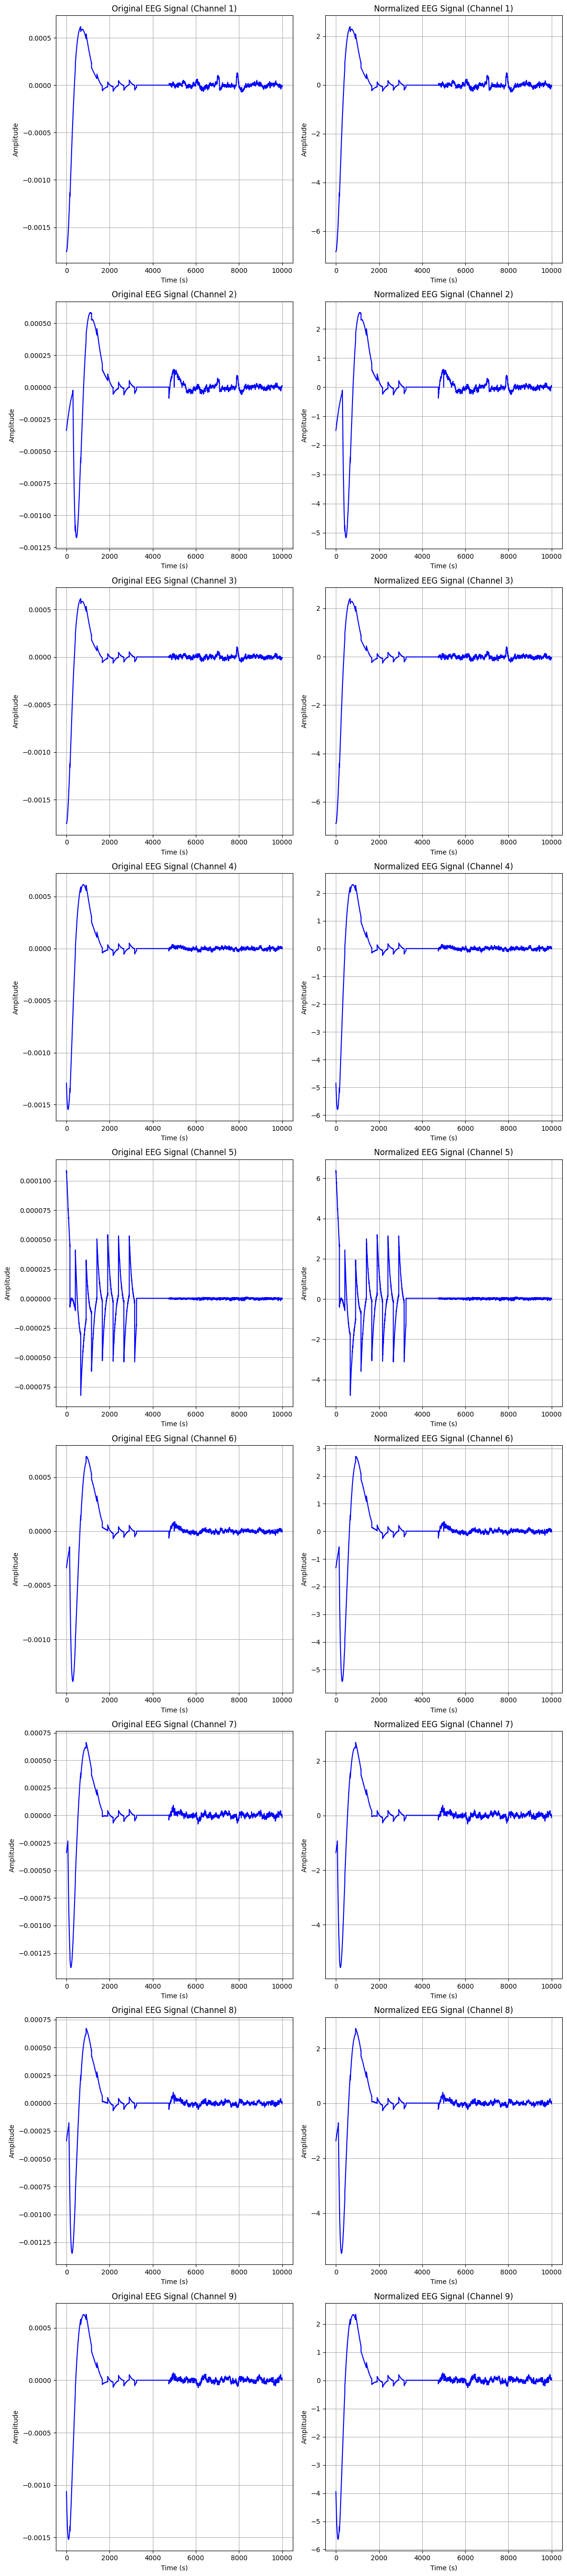

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Function to normalize each electrode separately
def normalize_electrodes_separately(data):
    normalized_data = np.zeros_like(data)
    for channel in range(data.shape[1]):  # Normalize each electrode/channel separately
        scaler = StandardScaler()
        channel_data = data[:, channel, :]  # Extract all samples for this channel
        normalized_channel = scaler.fit_transform(channel_data.T).T  # Normalize across all samples
        normalized_data[:, channel, :] = normalized_channel
    return normalized_data

# Normalize the control EEG data
control_data = np.array(control_data)
normalized_control_data = normalize_electrodes_separately(control_data)

# Function to plot signals before and after normalization for each electrode
def plot_signals_before_after(original_data, normalized_data, sample_idx=0):
    n_channels = original_data.shape[1]
    plt.figure(figsize=(12, 6 * n_channels))

    for channel_idx in range(n_channels):
        # Original signal
        plt.subplot(n_channels, 2, 2 * channel_idx + 1)
        plt.plot(original_data[sample_idx, channel_idx], color='blue')
        plt.title(f'Original EEG Signal (Channel {channel_idx + 1})')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.grid(True)
        
        # Normalized signal
        plt.subplot(n_channels, 2, 2 * channel_idx + 2)
        plt.plot(normalized_data[sample_idx, channel_idx], color='blue')
        plt.title(f'Normalized EEG Signal (Channel {channel_idx + 1})')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot EEG signals before and after normalization for the first sample
plot_signals_before_after(control_data, normalized_control_data, sample_idx=0)


## Model Analysis Visualization

The following figure summarizes multiple evaluation aspects of the **LSTM-CNN V2 model** in a single 2×4 layout:

- **Figure 7a** → Training vs Validation Accuracy  
- **Figure 7b** → Training vs Validation Loss  
- **Figure 7c** → t-SNE projection of latent features (True Labels)  
- **Figure 7d** → t-SNE projection of latent features (Predicted Labels)  
- **Figure 7e** → ROC curve with AUC score  
- **Figure 7f** → Confusion Matrix  
- **Figure 7g** → Sensitivity & Specificity across classes  
- **Figure 7h** → Occlusion-based channel importance with significance markers  

This combined visualization provides an **end-to-end overview** of model learning, latent space structure, predictive performance, and interpretability.


In [28]:
# Extract metrics from history
train_loss = history_lstm_cnnV2.history['loss']
val_loss   = history_lstm_cnnV2.history['val_loss']
train_acc  = history_lstm_cnnV2.history['accuracy']   # or 'acc' in older versions
val_acc    = history_lstm_cnnV2.history['val_accuracy']  # or 'val_acc' in older versions

# Epochs
epochs = range(1, len(train_loss) + 1)


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 385ms/step


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


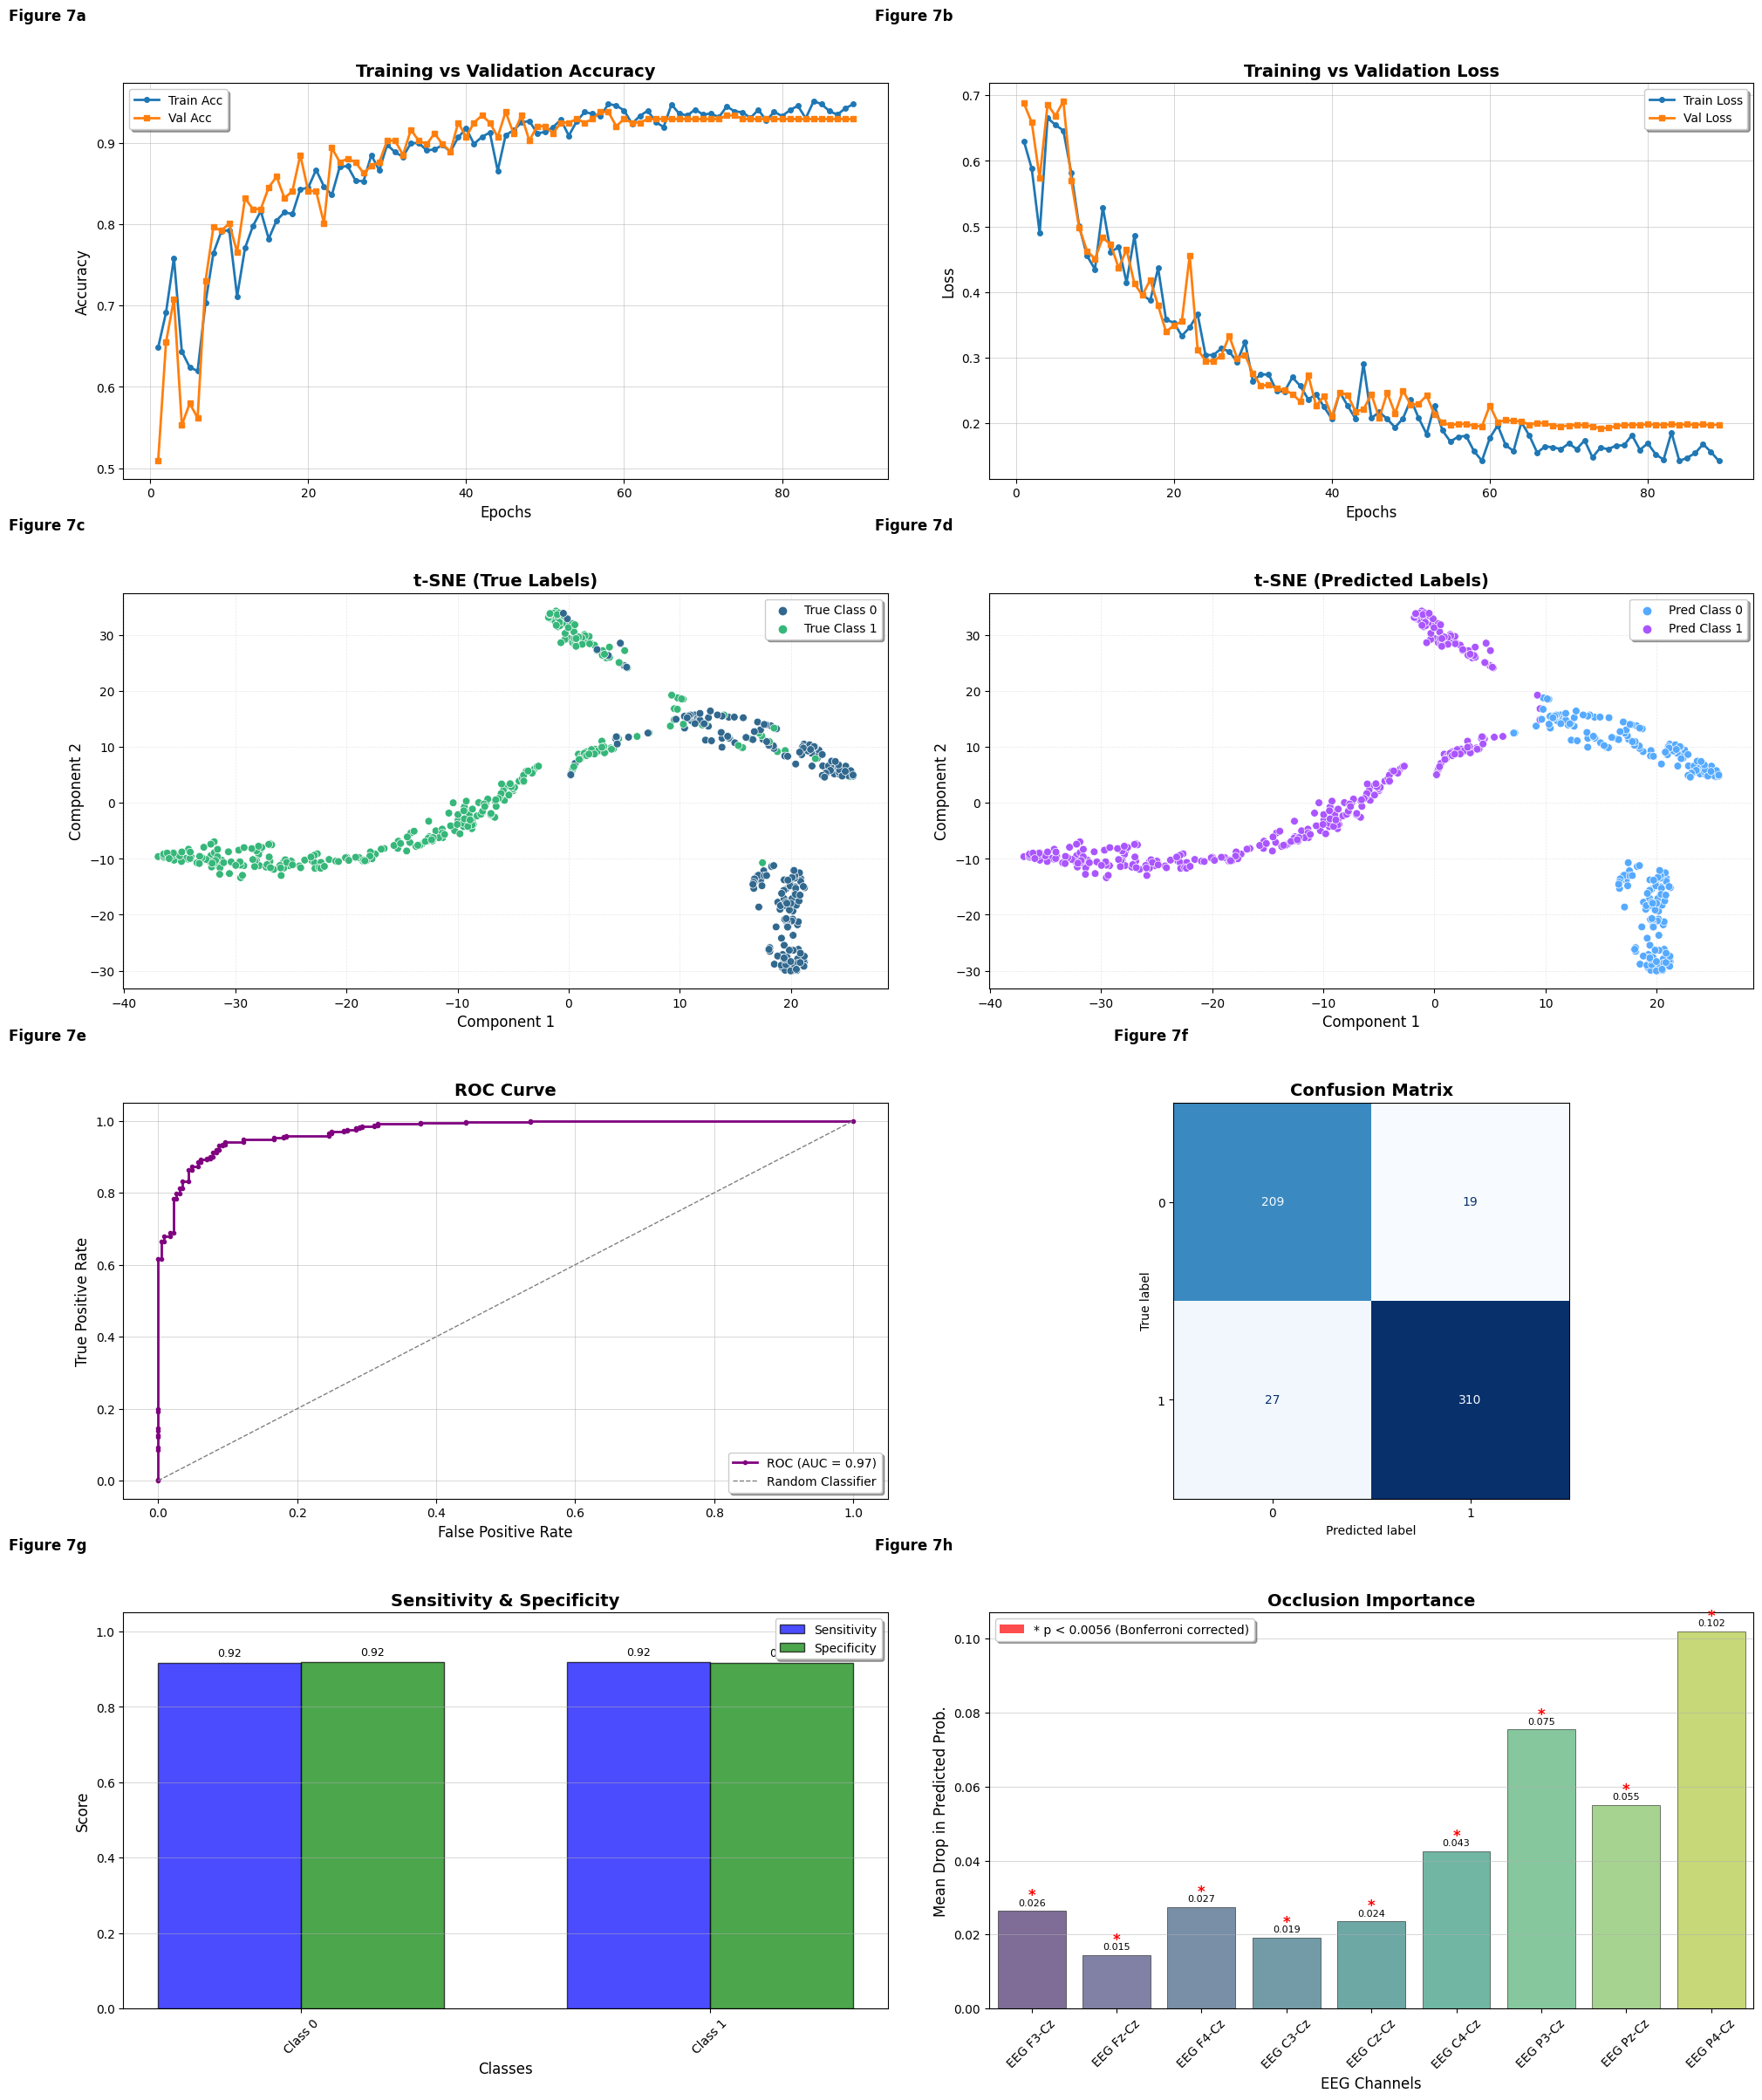

✅ Saved enhanced 8-in-1 plot with legends, grids, and figure numbering


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
from scipy.stats import ttest_rel
import tensorflow as tf
from matplotlib.patches import Patch


# --- 2. Get Predictions ---
y_pred_probs = model_lstm_cnnV2.predict(X_test)
y_true = np.argmax(Y_test, axis=1) if Y_test.ndim > 1 else Y_test
y_pred = np.argmax(y_pred_probs, axis=1)

# --- 3. ROC Curve ---
fpr, tpr, _ = roc_curve(Y_test[:, 1], y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

# --- 4. Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)

# --- 5. Sensitivity & Specificity ---
sensitivity = []
specificity = []
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    sensitivity.append(TP / (TP + FN) if (TP + FN) > 0 else 0)
    specificity.append(TN / (TN + FP) if (TN + FP) > 0 else 0)
class_labels = [f"Class {i}" for i in range(len(cm))]

# --- 6. t-SNE Latent Space ---
penultimate_layer = model_lstm_cnnV2.layers[-2]
intermediate_model = tf.keras.Model(inputs=model_lstm_cnnV2.input, outputs=penultimate_layer.output)
latent_features = intermediate_model.predict(X_test, verbose=0)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(latent_features)
predicted_labels = y_pred
true_labels = y_true

# --- 7. Occlusion Test ---
X_all = np.concatenate([X_train, X_test], axis=0)
raw_ch_names = ['EEG F3-Cz', 'EEG Fz-Cz', 'EEG F4-Cz', 'EEG C3-Cz', 'EEG Cz-Cz', 'EEG C4-Cz',
                'EEG P3-Cz', 'EEG Pz-Cz', 'EEG P4-Cz']
SAMPLE_INDICES = np.arange(X_all.shape[0])
baseline_probs = model_lstm_cnnV2.predict(X_all[SAMPLE_INDICES], verbose=0)
pred_classes = baseline_probs.argmax(axis=1)
baseline_pred_probs = baseline_probs[np.arange(len(SAMPLE_INDICES)), pred_classes]
channel_drops = []
pvals = []
for ch in range(X_all.shape[2]):
    X_occ = X_all[SAMPLE_INDICES].copy()
    X_occ[:, :, ch] = 0.0
    occ_probs = model_lstm_cnnV2.predict(X_occ, verbose=0)
    occ_pred_probs = occ_probs[np.arange(len(SAMPLE_INDICES)), pred_classes]
    drop = baseline_pred_probs - occ_pred_probs
    channel_drops.append(drop.mean())
    _, pval = ttest_rel(baseline_pred_probs, occ_pred_probs, alternative='greater')
    pvals.append(pval)
alpha = 0.05 / len(channel_drops)

# --- 8. 2x4 Plot Layout ---
fig, axs = plt.subplots(4, 2, figsize=(20, 24))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Row 1: Accuracy & Loss
axs[0, 0].plot(epochs, train_acc, label="Train Acc", linewidth=2, marker='o', markersize=4)
axs[0, 0].plot(epochs, val_acc, label="Val Acc", linewidth=2, marker='s', markersize=4)
axs[0, 0].set_title("Training vs Validation Accuracy", fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel("Epochs", fontsize=12)
axs[0, 0].set_ylabel("Accuracy", fontsize=12)
axs[0, 0].legend(loc='best', frameon=True, fancybox=True, shadow=True)
axs[0, 0].grid(True, alpha=0.7, linestyle='-', linewidth=0.5)

axs[0, 1].plot(epochs, train_loss, label="Train Loss", linewidth=2, marker='o', markersize=4)
axs[0, 1].plot(epochs, val_loss, label="Val Loss", linewidth=2, marker='s', markersize=4)
axs[0, 1].set_title("Training vs Validation Loss", fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel("Epochs", fontsize=12)
axs[0, 1].set_ylabel("Loss", fontsize=12)
axs[0, 1].legend(loc='best', frameon=True, fancybox=True, shadow=True)
axs[0, 1].grid(True, alpha=0.7, linestyle='-', linewidth=0.5)

# Row 2: t-SNE
scatter1 = sns.scatterplot(ax=axs[1, 0], x=X_tsne[:, 0], y=X_tsne[:, 1], hue=true_labels,
                          palette="viridis", s=40)
axs[1, 0].set_title("t-SNE (True Labels)", fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel("Component 1", fontsize=12)
axs[1, 0].set_ylabel("Component 2", fontsize=12)
axs[1, 0].grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
handles1, labels1 = axs[1, 0].get_legend_handles_labels()
axs[1, 0].legend(handles1, [f'True Class {i}' for i in np.unique(true_labels)], 
                loc='best', frameon=True, fancybox=True, shadow=True)

scatter2 = sns.scatterplot(ax=axs[1, 1], x=X_tsne[:, 0], y=X_tsne[:, 1], hue=predicted_labels,
                          palette="cool", s=40)
axs[1, 1].set_title("t-SNE (Predicted Labels)", fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel("Component 1", fontsize=12)
axs[1, 1].set_ylabel("Component 2", fontsize=12)
axs[1, 1].grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
handles2, labels2 = axs[1, 1].get_legend_handles_labels()
axs[1, 1].legend(handles2, [f'Pred Class {i}' for i in np.unique(predicted_labels)], 
                loc='best', frameon=True, fancybox=True, shadow=True)

# Row 3: ROC & Confusion Matrix
axs[2, 0].plot(fpr, tpr, color='purple', lw=2, label=f'ROC (AUC = {roc_auc:.2f})', marker='o', markersize=3)
axs[2, 0].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
axs[2, 0].set_title("ROC Curve", fontsize=14, fontweight='bold')
axs[2, 0].set_xlabel("False Positive Rate", fontsize=12)
axs[2, 0].set_ylabel("True Positive Rate", fontsize=12)
axs[2, 0].legend(loc='best', frameon=True, fancybox=True, shadow=True)
axs[2, 0].grid(True, alpha=0.7, linestyle='-', linewidth=0.5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axs[2, 1], cmap=plt.cm.Blues, colorbar=False)
axs[2, 1].set_title("Confusion Matrix", fontsize=14, fontweight='bold')

# Row 4: Sensitivity & Occlusion
x = np.arange(len(class_labels))
width = 0.35
bars1 = axs[3, 0].bar(x - width/2, sensitivity, width, label='Sensitivity', color='blue', alpha=0.7, edgecolor='black')
bars2 = axs[3, 0].bar(x + width/2, specificity, width, label='Specificity', color='green', alpha=0.7, edgecolor='black')
axs[3, 0].set_ylim([0, 1.05])
axs[3, 0].set_title("Sensitivity & Specificity", fontsize=14, fontweight='bold')
axs[3, 0].set_xlabel("Classes", fontsize=12)
axs[3, 0].set_ylabel("Score", fontsize=12)
axs[3, 0].set_xticks(x)
axs[3, 0].set_xticklabels(class_labels, rotation=45)
axs[3, 0].legend(loc='best', frameon=True, fancybox=True, shadow=True)
axs[3, 0].grid(True, alpha=0.7, linestyle='-', linewidth=0.5, axis='y')
for bar in bars1:
    height = bar.get_height()
    axs[3, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.2f}', ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    axs[3, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.2f}', ha='center', va='bottom', fontsize=9)

bars_occ = sns.barplot(ax=axs[3, 1], x=raw_ch_names, y=channel_drops, palette="viridis", alpha=0.7)
for patch in axs[3, 1].patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)
axs[3, 1].set_title("Occlusion Importance", fontsize=14, fontweight='bold')
axs[3, 1].set_ylabel("Mean Drop in Predicted Prob.", fontsize=12)
axs[3, 1].set_xlabel("EEG Channels", fontsize=12)
axs[3, 1].grid(True, alpha=0.7, linestyle='-', linewidth=0.5, axis='y')
for i, (drop, p) in enumerate(zip(channel_drops, pvals)):
    if p < alpha:
        axs[3, 1].text(i, drop + 0.002, '*', ha='center', va='bottom', fontsize=12, color='red', fontweight='bold')
    axs[3, 1].text(i, drop + 0.001, f'{drop:.3f}', ha='center', va='bottom', fontsize=8, rotation=0)
axs[3, 1].tick_params(axis='x', rotation=45)
legend_elements = [Patch(facecolor='red', alpha=0.7, label=f'* p < {alpha:.4f} (Bonferroni corrected)')]
axs[3, 1].legend(handles=legend_elements, loc='best', frameon=True, fancybox=True, shadow=True)

# --- Add subplot labels (Figure numbering) ---
start_num = 7
subplot_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
for i, ax in enumerate(axs.flat):
    ax.text(-0.15, 1.15, f'Figure {start_num}{subplot_labels[i]}',
            transform=ax.transAxes, fontsize=12, fontweight='bold', va='bottom', ha='left')

# --- Save Final Plot ---
plt.tight_layout()
plt.savefig("model_analysis_2col_4row_layout2222.png", dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved enhanced 8-in-1 plot with legends, grids, and figure numbering")
